# Setup

## Mounting & Import

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/PRO yt_sentimental')

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora
!pip install emoji

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from textblob import TextBlob
import nltk

import emoji

## Loading Data Sets

In [ ]:
# YouTube Comment Data Sets
# data = pd.read_csv("./data/ytb_comments_noah_kegan_make_money.csv") # (320, 8)
# data = pd.read_csv("./data/ytb_comments.csv") # (60, 8)
# data = pd.read_csv("./data/ytb_comments_final_kaggle.csv") # (515, 8)
# data = pd.read_csv("./data/ytb_comments_1.csv") # (140, 8)
data = pd.read_csv("./data/ytb_comments_tom_scott_cn6.csv") # (360, 8)
# data = pd.read_csv("./data/ytb_video_list.csv") # list of YT links
data.head()

,cid,text,time,author,channel,votes,photo,heart
0,UggtN4eyEUXGe3gCoAEC,Welcome everyone who subscribed to this channe...,5 年前,Tom Scott,UCBa659QWEk1AI4Tg--mrJ2A,1825,https://yt3.ggpht.com/ytc/AKedOLTXiEEaFzttoTBJ...,0.0
1,UgxDPeWSgofLhrIMf_Z4AaABAg,When your DM says the game is set in world war...,4 年前,TunnelDragon44,UCD-JLDpRW-W_S6qXRjrAK5A,2286,https://yt3.ggpht.com/ytc/AKedOLQWNw7FBmwNm3NH...,0.0
2,UgxPJVkz2pZeIV6rDLx4AaABAg,"Gary discovered on Twitter today that ""Mad Jac...",1 年前,J.K. Wheeler,UCtoOHgMcZtPWoanXutDjYFw,107,https://yt3.ggpht.com/ytc/AKedOLRb2oRqMNbRoigF...,0.0
3,Ugi4B2AMlfmGrngCoAEC,Part of me wishes Jack Churchill and Seargent ...,5 年前,knightshousegames,UClOhF8TQZbixtf4ZRG3QAew,1016,https://yt3.ggpht.com/ytc/AKedOLS4X-8rgIP_Tax-...,0.0
4,UgxHdgb88KXW_LpNpBB4AaABAg,It's happened.\nThe Chris scored biscuits so h...,3 年前,Oliver Gs,UCNENEEfy05TPimwqK91yNxQ,666,https://yt3.ggpht.com/ytc/AKedOLRpG_BMsi1lcF2K...,0.0


In [ ]:
data.shape

(360, 8)

# Pre-Cleaning

In [ ]:
# removes missing values
data = data.dropna(subset=["text", "votes"])
data.shape

(360, 8)

In [ ]:
# translates Chinese to English
def clean_time (time):
  time = time.replace('年前', 'year ago')
  time = time.replace('(已編輯)', '(edited)')
  time = time.replace('個月前', 'months ago')
  return time

data['time'] = data['time'].apply(clean_time)

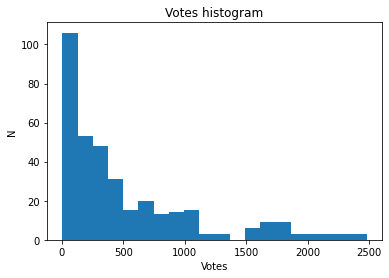

In [ ]:
plt.hist(data.votes, bins=20)
plt.title("Votes histogram")
plt.ylabel("N")
plt.xlabel("Votes")
plt.show()

In [ ]:
# Keep only text columns and review score
data = data[['text','time','author','votes']]
data.head()

,text,time,author,votes
0,Welcome everyone who subscribed to this channe...,5 year ago,Tom Scott,1825
1,When your DM says the game is set in world war...,4 year ago,TunnelDragon44,2286
2,"Gary discovered on Twitter today that ""Mad Jac...",1 year ago,J.K. Wheeler,107
3,Part of me wishes Jack Churchill and Seargent ...,5 year ago,knightshousegames,1016
4,It's happened.\nThe Chris scored biscuits so h...,3 year ago,Oliver Gs,666


# Polarity & Subjectivity (TextBlob)

In [ ]:
def comment_polarity (text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

def comment_subjectivity (text):
  blob = TextBlob(text)
  return blob.sentiment.subjectivity

data['polarity'] = data['text'].apply(comment_polarity)
data['subjectivity'] = data['text'].apply(comment_subjectivity)

data.head(10)

,text,time,author,votes,polarity,subjectivity
0,Welcome everyone who subscribed to this channe...,5 year ago,Tom Scott,1825,0.500000,0.522222
1,When your DM says the game is set in world war...,4 year ago,TunnelDragon44,2286,-0.100000,0.700000
2,"Gary discovered on Twitter today that ""Mad Jac...",1 year ago,J.K. Wheeler,107,-0.125000,0.360000
3,Part of me wishes Jack Churchill and Seargent ...,5 year ago,knightshousegames,1016,0.000000,0.000000
4,It's happened.\nThe Chris scored biscuits so h...,3 year ago,Oliver Gs,666,-0.291667,0.541667
5,This man's a tabletop campaign. The entire thing.,5 year ago,Glen Moody-Elias,1682,0.000000,0.625000
6,The best part was HOW he was captured by the G...,5 year ago,Sollow,2480,0.057143,0.414286
7,"He wasn't Scottish, but we'll happily claim hi...",4 year ago,Tay74,623,0.800000,1.000000
8,"""with a longbow you are quite a way back""\n""No...",1 year ago,Sam Sullivan,52,0.000000,0.000000
9,"""Any officer who goes into action without his ...",5 year ago,Khaotic Phoenix,1052,0.100000,0.100000


In [ ]:
def label_polarity (polar):
  ''' returns 0 = negative / 1 = neutral / 2 = positive
  '''
  if polar <= -0.3333:
    return 0
  elif polar > -0.3333 and polar < 0.3333:
    return 1
  else:
    return 2

data['polarity_labeled'] = data['polarity'].apply(label_polarity)
data.head(10)

,text,time,author,votes,polarity,subjectivity,polarity_labeled
0,Welcome everyone who subscribed to this channe...,5 year ago,Tom Scott,1825,0.500000,0.522222,2
1,When your DM says the game is set in world war...,4 year ago,TunnelDragon44,2286,-0.100000,0.700000,1
2,"Gary discovered on Twitter today that ""Mad Jac...",1 year ago,J.K. Wheeler,107,-0.125000,0.360000,1
3,Part of me wishes Jack Churchill and Seargent ...,5 year ago,knightshousegames,1016,0.000000,0.000000,1
4,It's happened.\nThe Chris scored biscuits so h...,3 year ago,Oliver Gs,666,-0.291667,0.541667,1
5,This man's a tabletop campaign. The entire thing.,5 year ago,Glen Moody-Elias,1682,0.000000,0.625000,1
6,The best part was HOW he was captured by the G...,5 year ago,Sollow,2480,0.057143,0.414286,1
7,"He wasn't Scottish, but we'll happily claim hi...",4 year ago,Tay74,623,0.800000,1.000000,2
8,"""with a longbow you are quite a way back""\n""No...",1 year ago,Sam Sullivan,52,0.000000,0.000000,1
9,"""Any officer who goes into action without his ...",5 year ago,Khaotic Phoenix,1052,0.100000,0.100000,1


## Visualising

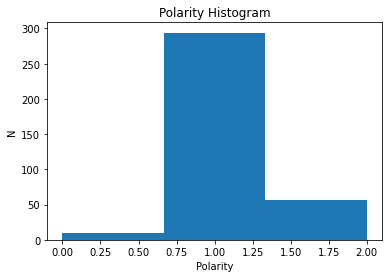

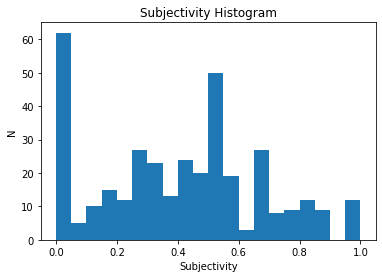

In [ ]:
# Polarity -1.0 - 1.0  positive or negative
plt.hist(data.polarity_labeled, bins=3)
plt.title("Polarity Histogram")
plt.ylabel("N")
plt.xlabel("Polarity")
plt.show()

# Subjectivity 0.0 - 1.0   0.0 = very objective, 1.0 = very subjective
# Subjectivity quantifies the amount of personal opinion and factual information contained in the text.
# The higher subjectivity means that the text contains personal opinion rather than factual information
plt.hist(data.subjectivity, bins=20)
plt.title("Subjectivity Histogram")
plt.ylabel("N")
plt.xlabel("Subjectivity")
plt.show()

In [ ]:
data.text[1]

AttributeError: ignored

In [ ]:
data.isna().sum()

text                0
time                0
author              0
votes               0
text_sentiment      0
polarity            0
subjectivity        0
polarity_labeled    0
dtype: int64

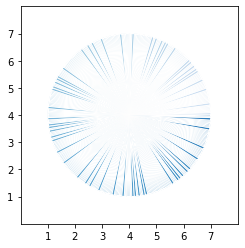

In [ ]:
# plt.style.use('_mpl-gallery-nogrid')


# make data
x = data.polarity_labeled
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# Topic Extraction

In [29]:
import requests

url = "https://api.meaningcloud.com/topics-2.0"

payload={
    'key': 'decff92032f07d22069be2800d5d1d6b',
    'txt': 'I love my cat Miley. She is the best cat i the world and I want her to be happy.',
    'lang': 'en',  # 2-letter code, like en es fr ...
    'tt': 'a'                      # all topics
}

response = requests.post(url, data=payload)

print('Status code:', response.status_code)
print(response.json())

Status code: 200
{'concept_list': [{'form': 'cat', 'id': 'af2c7e7b16', 'relevance': '100', 'sementity': {'class': 'class', 'fiction': 'nonfiction', 'id': 'ODENTITY_MAMMAL', 'type': 'Top>LivingThing>Animal>Vertebrate>Mammal'}, 'semld_list': ['http://en.wikipedia.org/wiki/Kitty', 'http://de.wikipedia.org/wiki/Kitty', 'http://fr.wikipedia.org/wiki/Kitty', 'http://it.wikipedia.org/wiki/Kitty', 'http://ja.wikipedia.org/wiki/キティ', 'http://ko.wikipedia.org/wiki/키티', 'http://nl.wikipedia.org/wiki/Kitty', 'http://sv.wikipedia.org/wiki/Kitty', 'http://tr.wikipedia.org/wiki/Kitty', 'sumo:Mammal'], 'semtheme_list': [{'id': 'ODTHEME_ZOOLOGY', 'type': 'Top>NaturalSciences>Zoology'}], 'variant_list': [{'endp': '12', 'form': 'cat', 'inip': '10'}, {'endp': '39', 'form': 'cat', 'inip': '37'}]}], 'entity_list': [{'form': 'Miley', 'id': '14374b74fb', 'relevance': '100', 'sementity': {'class': 'instance', 'fiction': 'nonfiction', 'id': 'ODENTITY_FIRST_NAME', 'type': 'Top>Person>FirstName'}, 'semld_list': [

In [57]:
payload['txt'] = data.text[3]

response = requests.post(url, data=payload)

print('Status code:', response.status_code)

Status code: 200


In [64]:
jres = response.json()
jres

{'concept_list': [{'form': 'path',
   'id': '52b872ac4d',
   'relevance': '100',
   'sementity': {'class': 'class',
    'fiction': 'nonfiction',
    'id': 'ODENTITY_LINE',
    'type': 'Top>Location>Facility>Line'},
   'semld_list': ['http://en.wikipedia.org/wiki/Route',
    'http://fr.wikipedia.org/wiki/Route_(homonymie)',
    'http://he.wikipedia.org/wiki/דרך_(פירושונים)',
    'http://it.wikipedia.org/wiki/Route',
    'http://ko.wikipedia.org/wiki/라우트',
    'http://ro.wikipedia.org/wiki/Drum_(dezambiguizare)',
    'http://ru.wikipedia.org/wiki/Маршрут_(значения)',
    'sumo:Transitway'],
   'variant_list': [{'endp': '79', 'form': 'paths', 'inip': '75'}]}],
 'entity_list': [{'form': 'Jack Churchill',
   'id': '__4090139449268551422',
   'relevance': '100',
   'sementity': {'class': 'instance',
    'confidence': 'unknown',
    'type': 'Top>Person>FullName'},
   'variant_list': [{'endp': '31', 'form': 'Jack Churchill', 'inip': '18'}]},
  {'form': 'Seargent Reckless',
   'id': '__65806785

# Analyse Emojis in comments

In [ ]:
str=''
for i in data['text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI['en']]
    for ele in list:
        str=str+ele

print(len(str))
print(len(data))

3
360


In [ ]:
# create a dictionary of having each emoji with its frequency as well
result={}
for i in set(str):
    result[i]=str.count(i)

In [ ]:
# sort the emojis according to its count or frequency
result.items()

dict_items([('🤣', 3)])

In [ ]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [ ]:
# convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]
values=[*final.values()]

In [ ]:
df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})
df

,chars,num
0,🤣,3


In [ ]:
text = "Hello I Love you my dear computer. I wanna make love to you and love you endless like a little fuck toy."
blob = TextBlob(text)

In [ ]:
blob.tags

[('Hello', 'NNP'),
 ('I', 'PRP'),
 ('Love', 'VBP'),
 ('you', 'PRP'),
 ('my', 'PRP$'),
 ('dear', 'JJ'),
 ('computer', 'NN'),
 ('I', 'PRP'),
 ('wan', 'VBP'),
 ('na', 'RB'),
 ('make', 'VB'),
 ('love', 'NN'),
 ('to', 'TO'),
 ('you', 'PRP'),
 ('and', 'CC'),
 ('love', 'VB'),
 ('you', 'PRP'),
 ('endless', 'VBP'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('fuck', 'JJ'),
 ('toy', 'NN')]

In [ ]:
blob.word_counts

defaultdict(int,
            {'a': 1,
             'and': 1,
             'computer': 1,
             'dear': 1,
             'endless': 1,
             'fuck': 1,
             'hello': 1,
             'i': 2,
             'like': 1,
             'little': 1,
             'love': 3,
             'make': 1,
             'my': 1,
             'na': 1,
             'to': 1,
             'toy': 1,
             'wan': 1,
             'you': 3})

In [ ]:
blob.noun_phrases

WordList(['hello', 'love', 'dear computer', 'wan na', 'fuck toy'])

In [ ]:
blob.sentiment

Sentiment(polarity=0.13125, subjectivity=0.6083333333333333)

In [ ]:
blob.correct()

TextBlob("Hello I Love you my dear computer. I anna make love to you and love you endless like a little fuck toy.")

In [ ]:
blob.sentiment_assessments

Sentiment(polarity=0.13125, subjectivity=0.6083333333333333, assessments=[(['love'], 0.5, 0.6, None), (['love'], 0.5, 0.6, None), (['love'], 0.5, 0.6, None), (['endless'], -0.125, 0.75, None), (['little'], -0.1875, 0.5, None), (['fuck'], -0.4, 0.6, 'profanity')])

In [ ]:
blob.np_counts

defaultdict(int,
            {'dear computer': 1,
             'fuck toy': 1,
             'hello': 1,
             'love': 1,
             'wan na': 1})

In [ ]:
blob.serialized

[{'end_index': 34,
  'noun_phrases': WordList(['hello', 'love', 'dear computer']),
  'polarity': 0.5,
  'raw': 'Hello I Love you my dear computer.',
  'start_index': 0,
  'stripped': 'hello i love you my dear computer',
  'subjectivity': 0.6},
 {'end_index': 104,
  'noun_phrases': WordList(['wan na', 'fuck toy']),
  'polarity': 0.057499999999999996,
  'raw': 'I wanna make love to you and love you endless like a little fuck toy.',
  'start_index': 35,
  'stripped': 'i wanna make love to you and love you endless like a little fuck toy',
  'subjectivity': 0.6100000000000001}]